In [4]:
import warnings
import itertools
from math import sqrt
from datetime import datetime
from numpy import concatenate
import numpy as np
import pandas as pd
import math
import os
pd.set_option("Display.max_columns",None)

In [115]:
import matplotlib.pyplot as plt

In [5]:
# "dataset_combined" klasörüne git
folder_path = "/Users/eyupburakatahanli/Desktop/Tubitak_Air_pol/dataset_combined"
os.chdir(folder_path)
dfs = {}
# tüm CSV dosyalarını al ve oku
for filename in os.listdir():
    if filename.endswith(".csv"):
        # dosya adından DataFrame adını ve dosya adını çıkart
        df_name = filename.split(".")[0].replace(" ", "")
        df = pd.read_csv(filename)
        exec(df_name + " = pd.DataFrame(df)") # DataFrame'i kaydet
        dfs[df_name] = df



/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_44421/2805332446.py:10: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_44421/2805332446.py:10: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_44421/2805332446.py:10: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_44421/2805332446.py:10: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_44421/2805332446.py:10: DtypeWarning: Columns (14,15,16) have mix

dict_keys(['Arnavutköy', 'Beşiktaş', 'Kartal', 'Bağcılar', 'Göztepe', 'Sancaktepe', 'Tuzla', 'Sultangazi3', 'Sultangazi2', 'Sultangazi1', 'Üsküdar1', 'Yenibosna', 'Mobil', 'Sarıyer', 'Ümraniye1', 'Esenler', 'Çatladıkapı', 'Büyükada', 'Kandilli1', 'Kumköy', 'Maslak', 'Aksaray', 'Alibeyköy', 'Avcılar', 'Kadıköy', 'Kağıthane1', 'Selimiye', 'Beylikdüzü'])


/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_44421/2805332446.py:10: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_44421/2805332446.py:10: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename)


In [8]:
seasons = {
    1: "Winter",
    2: "Winter",
    3: "Spring",
    4: "Spring",
    5: "Spring",
    6: "Summer",
    7: "Summer",
    8: "Summer",
    9: "Autumn",
    10: "Autumn",
    11: "Autumn",
    12: "Winter"
}

In [9]:
def categorize_hour(hour):
    if hour < 8:
        return 'Night'
    elif hour < 16:
        return 'Day'
    else:
        return 'Evening'

In [10]:
for district, df in dfs.items():
    #format dönüşümü
    dfs[district]['ReadTime'] = pd.to_datetime(dfs[district]['ReadTime'], format='%Y-%m-%dT%H:%M:%S')
    #gün ay yıl- olarak ayı değişkenlere atanması
    dfs[district]["Year"] = dfs[district]["ReadTime"].dt.year
    dfs[district]["Day"] = dfs[district]["ReadTime"].dt.day
    dfs[district]["Month"] = dfs[district]["ReadTime"].dt.month
    #saat değişkeni ve buna uygun kategorinin eklenmesi
    dfs[district]["Hour"] = dfs[district]["ReadTime"].dt.hour
    dfs[district]['HourCategory'] = dfs[district]['Hour'].apply(categorize_hour)
    #Mevsim değişkeni ve kategorisinin eklenmesi
    dfs[district]['Season'] = dfs[district]['ReadTime'].dt.month.map(seasons)

    #aqı endex değeri nan olan tüm değişkenleri siliyoruz
    dfs[district] = dfs[district].dropna(subset=['AQIINDEX_AQI'])

    #sonraki çalışmalarda 2023 yılına ait bir değişken olduğunu farkettik bunu siliyoruz
    dfs[district].drop(dfs[district][dfs[district]['Year'] == 2023].index,inplace=True)

/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_44421/4198393816.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[district].drop(dfs[district][dfs[district]['Year'] == 2023].index,inplace=True)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_44421/4198393816.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs[district].drop(dfs[district][dfs[district]['Year'] == 2023].index,inplace=True)
/var/folders/fd/qxb5q9_90ds63d5jvf0jqgsr0000gn/T/ipykernel_44421/4198393816.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the do

In [39]:
dfs.keys()

dict_keys(['Arnavutköy', 'Beşiktaş', 'Kartal', 'Bağcılar', 'Göztepe', 'Sancaktepe', 'Tuzla', 'Sultangazi3', 'Sultangazi2', 'Sultangazi1', 'Üsküdar1', 'Yenibosna', 'Mobil', 'Sarıyer', 'Ümraniye1', 'Esenler', 'Çatladıkapı', 'Büyükada', 'Kandilli1', 'Kumköy', 'Maslak', 'Aksaray', 'Alibeyköy', 'Avcılar', 'Kadıköy', 'Kağıthane1', 'Selimiye', 'Beylikdüzü'])

In [84]:
dfs

{'Arnavutköy':                   ReadTime  Unnamed: 1   PM10  SO2    O3   NO2      CO  \
 71680  2018-03-02 14:00:00         NaN    0.0  0.0   0.0   0.0     0.0   
 71681  2018-03-02 15:00:00         NaN    NaN  NaN   NaN   NaN     NaN   
 71682  2018-03-02 16:00:00         NaN    0.0  0.0   0.0   0.0     0.0   
 71683  2018-03-02 17:00:00         NaN    0.0  0.0   0.0   0.0     0.0   
 71684  2018-03-02 18:00:00         NaN    0.0  0.0   0.0   0.0     0.0   
 ...                    ...         ...    ...  ...   ...   ...     ...   
 114102 2022-12-31 19:00:00         NaN   63.0  3.4  12.9  39.6   682.9   
 114103 2022-12-31 20:00:00         NaN   87.0  3.3  12.4  33.8   644.2   
 114104 2022-12-31 21:00:00         NaN   76.0  3.6   2.5  48.9   945.8   
 114105 2022-12-31 22:00:00         NaN  118.0  3.1   4.2  41.4   721.3   
 114106 2022-12-31 23:00:00         NaN   84.0  3.5   1.2  53.6  1008.0   
 
         Unnamed: 7  PM10_AQI  SO2_AQI  O3_AQI  NO2_AQI  CO_AQI  AQIINDEX_AQI  \
 71

Arnavutköy

In [35]:
def günici_hesap(df,zaman):
    """
    bu fonksiyon veri çerçevelerine eklenen gün içi zaman dilimlerine göre filtreleme yapıp ortalama çıkarmaya yarar
    """
    filtreli_veri = df[df['HourCategory'] == zaman]
    filtreli_ortalama = filtreli_veri['AQIINDEX_AQI'].mean()
    return filtreli_ortalama 

In [135]:
def plot_günici_hesap(df):
    """
    bu fonksiyon veri çerçevelerine eklenen gün içi zaman dilimlerine göre filtreleme yapıp ortalama çıkarmaya yarar
    """
    filtreli_veri = df[df['HourCategory'] == "Day"]
    df_day_mean = filtreli_ortalama = filtreli_veri['AQIINDEX_AQI'].mean()
    
    filtreli_veri = df[df['HourCategory'] == "Evening"]
    df_evening_mean = filtreli_ortalama = filtreli_veri['AQIINDEX_AQI'].mean()
    
    filtreli_veri = df[df['HourCategory'] == "Night"]
    df_night_mean = filtreli_ortalama = filtreli_veri['AQIINDEX_AQI'].mean()
    
    bar_width = 0.5
    kategoriler = ["Gündüz","Akşam","Gece"]
    renkler = ['blue', 'green', 'orange'] 


    bars = plt.bar(kategoriler, [df_day_mean, df_evening_mean, df_night_mean], width=bar_width,color=renkler)


    plt.xlabel('Kategoriler')
    plt.ylabel('Değerler')
    plt.title('Bar Grafiği')
    
    for i, bar in enumerate(bars):
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        plt.text(x, y, f'{y:.3f}', ha='center', va='bottom')


    plt.show()

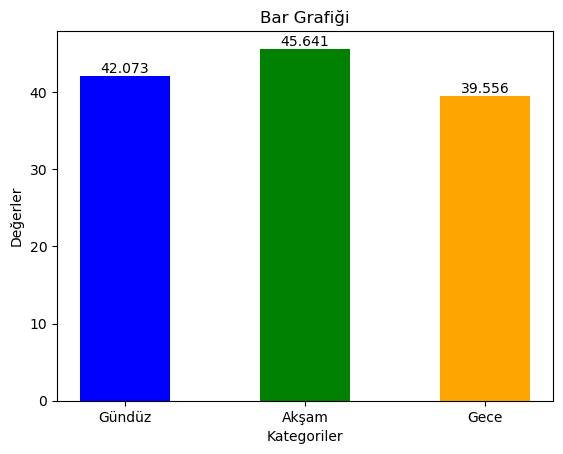

In [136]:
plot_günici_hesap(dfs["Beşiktaş"])

In [105]:
def mevsim_hesap(df,zaman):
    """
    bu fonksiyon veri çerçevelerine eklenen mevsim verilerine göre filtreleme yapıp ortalamayı geri döndürür
    """
    filtreli_veri = df[df['Season'] == zaman]
    filtreli_ortalama = filtreli_veri['CO'].mean()
    return filtreli_ortalama 

In [106]:
mevsim_hesap(dfs["Ümraniye1"],"Winter")

70.71397511033933

In [107]:
mevsim_hesap(dfs["Ümraniye1"],"Summer")

42.55107869620026

In [108]:
mevsim_hesap(dfs["Ümraniye1"],"Autumn")

94.49465624099165

In [109]:
mevsim_hesap(dfs["Ümraniye1"],"Spring")

43.40270193903861